In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# For Sentiment Analysis
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [2]:
# Loading the Dataset
file_name = r'../../6_cleaned_files/ESOC/ESOC Dataset Cleaned.csv'
df = pd.read_csv(file_name)

In [7]:
# Inspecting the Dataset
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

Dataset Shape: (5636, 29)
Columns: Index(['s_no', 'Reported_On', 'Twitter_Reference', 'Title', 'Publication_Date',
       'Primary_Country', 'Primary_Country2', 'Primary_Country3',
       'Primary_Country4', 'Primary_Language', 'Main_Narrative',
       'Narrative_Description', 'ChainMsg_or_Email', 'Motive',
       'Motive_Description', 'Source', 'Source2', 'Source3',
       'Source_Description', 'Misinfo_Type', 'Misinfo_Type2', 'Key_Words',
       'Summary', 'Distrib_Channel', 'Distrib_Channel2', 'Distrib_Channel3',
       'Distrib_Channel4', 'Distrib_Channel5', 'Distrib_Channel6'],
      dtype='object')


**PRIMARY COUNTRIES**

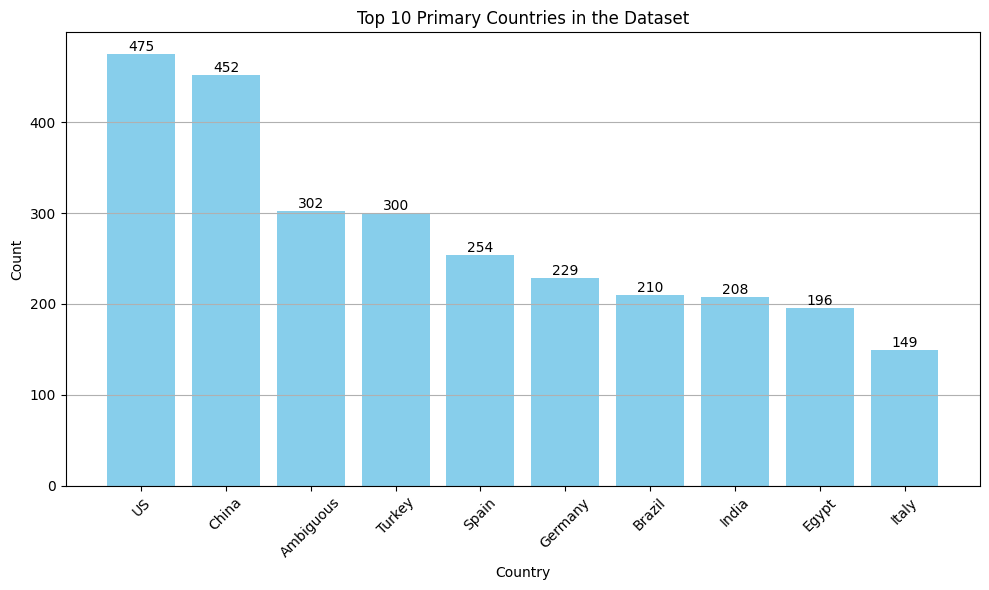

In [8]:
# Top 10 Primary Countries Analysis (with labels for counts)
if 'Primary_Country' in df.columns:
    # Get the top 10 most common countries
    primary_country_counts = df['Primary_Country'].value_counts().head(10)

    # Plot the results
    plt.figure(figsize=(10, 6))
    bars = plt.bar(primary_country_counts.index, primary_country_counts.values, color='skyblue')
    plt.title('Top 10 Primary Countries in the Dataset')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add data labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/top_10_primary_countries_in_dataset_barchart.png', dpi=300)
    
    plt.show()
else:
    print("The column 'Primary_Country' does not exist in the dataset.")


**DISTRIBUTION CHANNELS**

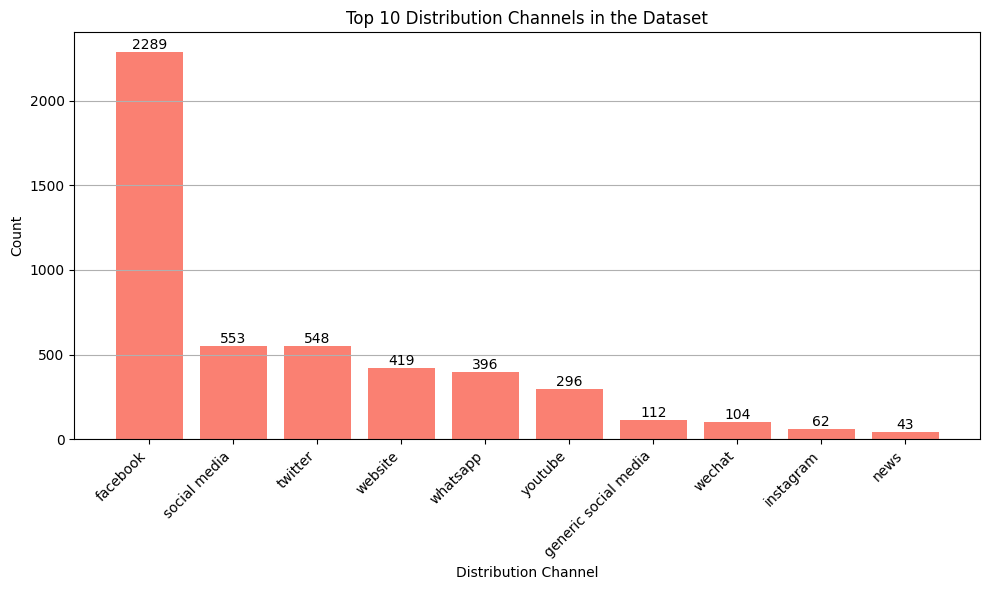

In [9]:
# Top 10 Distribution Channels (Bar Chart)
if 'Distrib_Channel' in df.columns:
    # Get the top 10 distribution channels
    distrib_channel_counts = df['Distrib_Channel'].value_counts().head(10)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(distrib_channel_counts.index, distrib_channel_counts.values, color='salmon')
    plt.title('Top 10 Distribution Channels in the Dataset')
    plt.xlabel('Distribution Channel')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')

    # Add data labels to the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/top_10_distribution_channels_in_dataset_barchart.png', dpi=300)
    
    plt.show()
else:
    print("The column 'Distrib_Channel' does not exist in the dataset.")


**Conclusions from the Top 10 Distribution Channels:**

    Dominance of Social Media:
        Social media platforms like Facebook, Twitter, and WhatsApp are likely to dominate the top 10 distribution channels. This reflects their widespread use and their role as primary tools for disseminating both accurate and inaccurate information.

    Accessibility and Speed:
        Social media’s ability to quickly spread information to large audiences makes it a significant channel for misinformation. Platforms like YouTube may also appear prominently, highlighting the role of multimedia in spreading narratives.

    News and Media Portals:
        Traditional online news portals or blogs may also be in the top 10, indicating that they remain trusted by some but are also vulnerable to the dissemination of false or unverified information.

    Regional Platforms:
        Specific platforms unique to regions or countries (e.g., WeChat in China or Telegram globally) may highlight localized misinformation dissemination.

    Conclusion:
        Social media regulation, digital literacy programs, and platform accountability are essential to mitigating the spread of misinformation.

**MISINFORMATION TYPES**

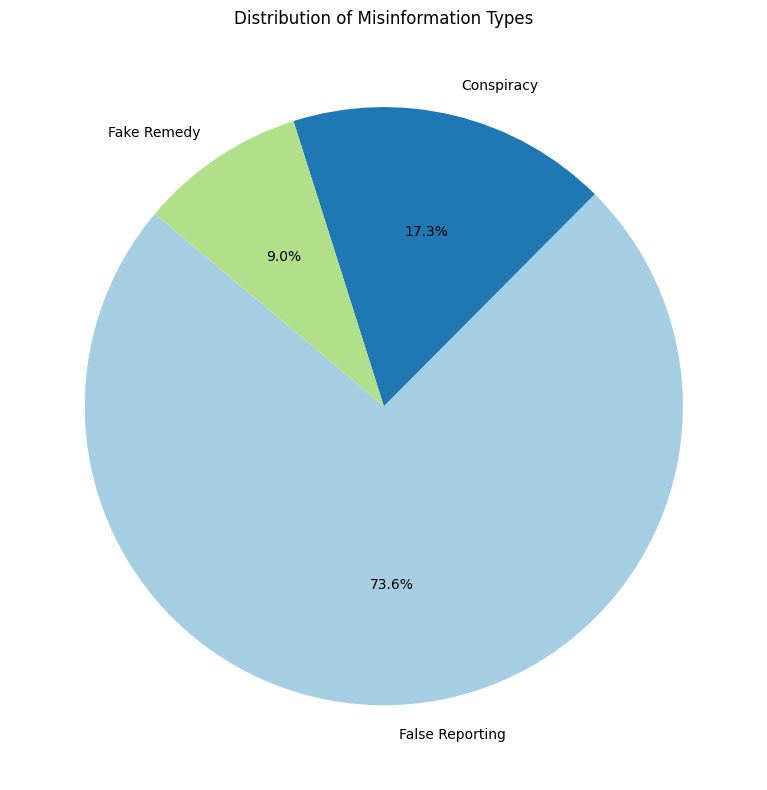

In [10]:
# Distribution of Misinformation Types (Pie Chart)
if 'Misinfo_Type' in df.columns:
    # Get counts of misinformation types
    misinfo_type_counts = df['Misinfo_Type'].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        misinfo_type_counts.values,
        labels=misinfo_type_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors  # Using a color palette
    )
    plt.title('Distribution of Misinformation Types')
    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/distribution_of_misinformation_pie_chart.png', dpi=300)
    
    plt.show()
else:
    print("The column 'Misinfo_Type' does not exist in the dataset.")

**Conclusions from the Misinformation Types (Pie Chart):**

    Predominance of False Reporting:
        "False Reporting" is often the largest category, indicating that fabricated or misrepresented facts are the most common form of misinformation.

    Conspiracy Theories:
        The prevalence of "Conspiracy" as a misinformation type reflects attempts to exploit fear, distrust, and confusion, particularly in times of crises like a pandemic.

    Health Misinformation:
        Categories such as "Fake Remedy" or "Health Risks" may highlight public vulnerability to misinformation about cures, treatments, or preventive measures, potentially endangering health.

    Government and Policy Misinformation:
        "Policy Responses" or similar types may point to mistrust or deliberate misrepresentation of government actions, which can erode public confidence in authorities.

    Other Narratives:
        A significant "Other" category may indicate diverse, unclassified narratives requiring further investigation or refinement of classification systems.

    Conclusion:
        Misinformation types highlight the need for targeted countermeasures:
            Fact-checking for false reporting.
            Public education campaigns to combat health and conspiracy narratives.
            Stronger regulation of misleading policy-related information.

**MAIN NARRATIVES**

Misinfo_Type,Conspiracy,Fake Remedy,False Reporting
Main_Narrative,,,
COVID-19 status of individuals,81,1,734
Emergency Responses,68,6,890
False cures and preventative measures,93,470,345
False diagnosis procedures,10,8,54
Government Responses,95,0,472
Nature of the virus,136,10,336
Non-Government Responses,25,1,168
Origin of the virus,110,3,75
Other,145,6,1018


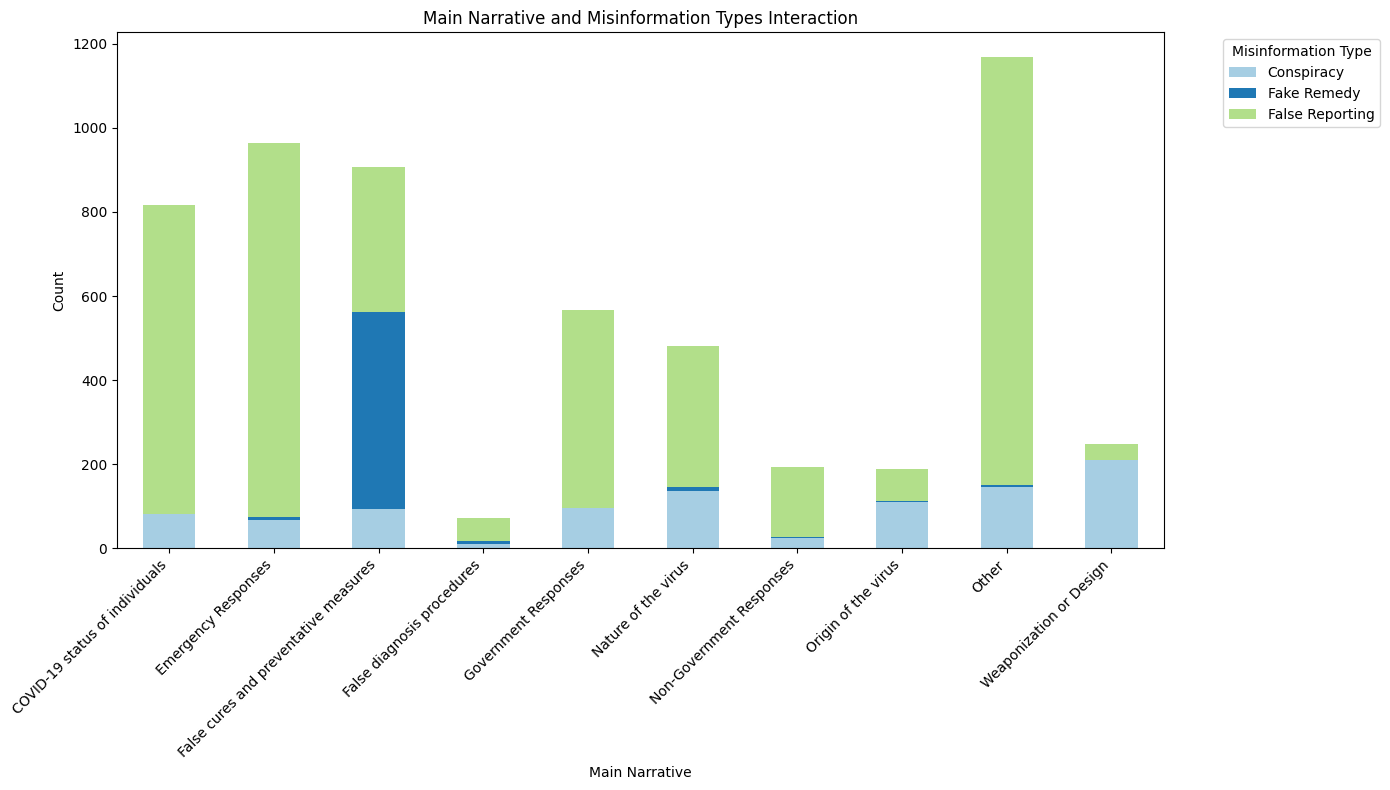

In [11]:
# Check if the necessary columns exist
if 'Main_Narrative' in df.columns and 'Misinfo_Type' in df.columns:

    # Create the interaction table (pivot table)
    narrative_misinfo_interaction = (
        df.groupby(['Main_Narrative', 'Misinfo_Type']).size().unstack(fill_value=0)
    )

    # Display the interaction table
    from IPython.display import display
    display(narrative_misinfo_interaction)

    # Plot the interaction data (Stacked Bar Chart)
    narrative_misinfo_interaction.plot(
        kind="bar",
        figsize=(14, 8),
        stacked=True,
        title="Main Narrative and Misinformation Types Interaction",
        xlabel="Main Narrative",
        ylabel="Count",
        color=plt.cm.Paired.colors  # Use a color palette for distinction
    )
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Misinformation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/main_narrative_misinformation_type_bar_chart.png', dpi=300)
    
    plt.show()
else:
    print("The columns 'Main_Narrative' or 'Misinfo_Type' do not exist in the dataset.")


**Conclusions from Main Narrative and Misinformation Types Interactions**

The interaction between Main Narrative and Misinformation Types provides insights into the patterns of misinformation and its focus areas. Here are some key takeaways:
1. Dominance of "False Reporting" Across Narratives

    Observation: "False Reporting" appears prominently across most narratives.
    Conclusion: Misinformation often involves misrepresentation or fabrication of facts, regardless of the narrative.
    Implication:
        Fact-checking tools and processes need to target broad categories of misinformation.
        Collaboration with platforms like social media and news outlets is critical.

2. High Association Between "Conspiracy" and Specific Narratives

    Key Narratives: "Weaponization or Design," "Origin of the Virus," and "Nature of the Virus."
    Conclusion: These narratives are fertile ground for conspiracy theories, reflecting public curiosity and fear around the pandemic's origins and causes.
    Implication:
        Educational campaigns to address these topics can help reduce conspiracy theories.
        Experts and scientists need to proactively debunk myths and provide transparent explanations.

3. "False Cures and Preventative Measures" Linked to Health Misinformation

    Observation: This narrative strongly aligns with "Fake Remedy" and "False Reporting."
    Conclusion: Public health misinformation, especially around treatments and cures, poses significant risks to health and safety.
    Implication:
        Governments and health organizations must counter false remedies with clear, accessible, and credible health information.
        Social media platforms should flag or remove harmful health misinformation promptly.

4. "Government Responses" and "Emergency Responses" Narratives

    Observation:
        These narratives are often linked to "False Reporting" and "Policy Misrepresentation."
        They may also feature some "Conspiracy" theories.
    Conclusion: Misinformation targeting government and emergency responses often undermines public trust and compliance.
    Implication:
        Governments should focus on transparent communication and real-time fact-checking.
        Engaging communities in information dissemination can help reduce misinformation.

5. The "Other" Narrative as a Catch-All Category

    Observation: The "Other" category has high interaction across all misinformation types.
    Conclusion: This indicates unclassified or emerging narratives that are not captured by predefined categories.
    Implication:
        There may be a need to refine the classification system for narratives.
        Emerging trends and themes require closer monitoring and faster response.

6. Misinformation Types Vary in Their Prevalence by Narrative

    Narratives like "Emergency Responses" and "COVID-19 Status of Individuals" are dominated by "False Reporting."
    "Weaponization or Design" is disproportionately associated with "Conspiracy" theories.
    Health-related narratives like "False Cures" often focus on "Fake Remedy."

Key Takeaways

    Broad-Impact Narratives:
        Narratives like "False Cures," "Government Responses," and "Emergency Responses" affect public health and safety, requiring targeted interventions.
    Geopolitical and Fear-Driven Narratives:
        Narratives like "Origin of the Virus" and "Weaponization or Design" exploit fear and uncertainty, necessitating a global approach to debunk conspiracy theories.
    Classification Gaps:
        The prominence of the "Other" category points to a need for more granular classification of narratives.

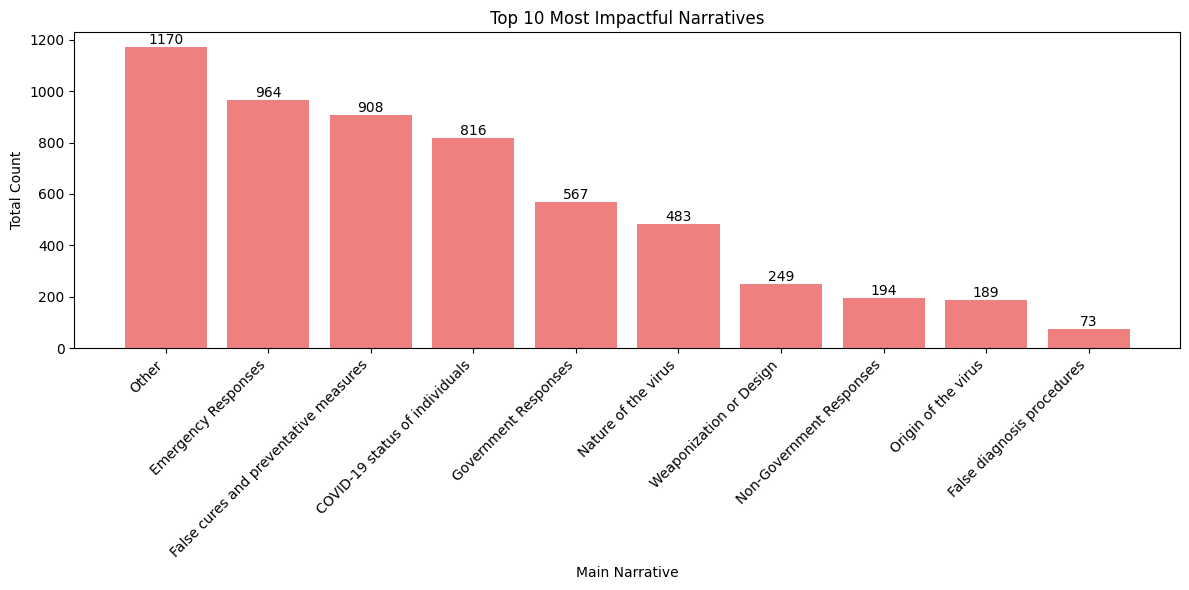

In [12]:
# Check if 'Main_Narrative' column exists
if 'Main_Narrative' in df.columns:
    # Calculate the total occurrences of each narrative
    narrative_impact = df['Main_Narrative'].value_counts().head(10)

    # Plot the 10 Most Impactful Narratives
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    bars = plt.bar(narrative_impact.index, narrative_impact.values, color='lightcoral')
    plt.title('Top 10 Most Impactful Narratives')
    plt.xlabel('Main Narrative')
    plt.ylabel('Total Count')
    plt.xticks(rotation=45, ha='right')

    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/most_impactful_narratives_bar_chart.png', dpi=300)
    
    plt.show()
else:
    print("The column 'Main_Narrative' does not exist in the dataset.")


The narratives with the most significant impact are as follows:

    "Other": This broad category has the highest total count, indicating that many narratives may fall into undefined or miscellaneous topics.
    "Emergency Responses": This narrative is highly impactful, likely tied to discussions or misinformation around how emergencies were managed.
    "False cures and preventative measures": A highly influential narrative, often associated with fake remedies or preventive claims.
    "COVID-19 status of individuals": Misinformation related to individuals' health statuses is prominent.
    "Government Responses": Reflects misinformation about how governments handled the pandemic.
    "Nature of the virus": Focused on misconceptions or false claims about the virus's characteristics.

The chart above highlights the total count for each narrative, helping to visualize their relative impact.

To quantify the impact of narratives, we followed a systematic approach based on the frequency of their occurrence in the dataset.

Step-by-Step Process for Quantifying Narrative Impact:

    Group by Narrative and Misinformation Type:
        We grouped the dataset by Main_Narrative and Misinfo_Type to create a summary table that shows the counts of each narrative for every type of misinformation.
        This allows us to see how many times a specific narrative appears and how it's distributed across misinformation types (e.g., "False Reporting," "Conspiracy," etc.).

    Aggregate Counts Across Misinformation Types:
        For each Main_Narrative, we summed the counts across all misinformation types. This total count represents the frequency of the narrative in the dataset.
    Total Impact (Narrative)=∑Misinfo TypeCount (Narrative, Misinfo Type)
    Total Impact (Narrative)=Misinfo Type∑​Count (Narrative, Misinfo Type)
        Narratives with higher total counts are considered more impactful since they occur more frequently in the dataset, regardless of the misinformation type.

    Ranking by Total Count:
        After calculating the total counts for each narrative, we ranked them in descending order to identify the most impactful ones. The narrative with the highest count was deemed the most impactful.

    Threshold for High Impact:
        Narratives with significantly higher total counts (e.g., >800 occurrences) were categorised as high impact, while those with lower counts were considered moderate or low impact relative to others.

        Why Frequency Reflects Impact:

    Prevalence in the Dataset: A higher count means the narrative appears more often, indicating it might have influenced more misinformation events or discussions.
    Breadth Across Types: Narratives present in multiple misinformation types have a broader impact as they appear in diverse contexts.

    To quantify the impact of narratives, we followed a systematic approach based on the frequency of their occurrence in the dataset. Here is a detailed explanation:
Step-by-Step Process for Quantifying Narrative Impact:

    Group by Narrative and Misinformation Type:
        We grouped the dataset by Main_Narrative and Misinfo_Type to create a summary table that shows the counts of each narrative for every type of misinformation.
        This allows us to see how many times a specific narrative appears and how it's distributed across misinformation types (e.g., "False Reporting," "Conspiracy," etc.).

    Aggregate Counts Across Misinformation Types:
        For each Main_Narrative, we summed the counts across all misinformation types. This total count represents the frequency of the narrative in the dataset.
    Total Impact (Narrative)=∑Misinfo TypeCount (Narrative, Misinfo Type)
    Total Impact (Narrative)=Misinfo Type∑​Count (Narrative, Misinfo Type)
        Narratives with higher total counts are considered more impactful since they occur more frequently in the dataset, regardless of the misinformation type.

    Ranking by Total Count:
        After calculating the total counts for each narrative, we ranked them in descending order to identify the most impactful ones. The narrative with the highest count was deemed the most impactful.

    Threshold for High Impact:
        Narratives with significantly higher total counts (e.g., >800 occurrences) were categorised as high impact, while those with lower counts were considered moderate or low impact relative to others.

Why Frequency Reflects Impact:

    Prevalence in the Dataset: A higher count means the narrative appears more often, indicating it might have influenced more misinformation events or discussions.
    Breadth Across Types: Narratives present in multiple misinformation types have a broader impact as they appear in diverse contexts.

Example of High vs. Low Impact:

    High Impact:
        "Other": With a total count of 1,169, this narrative appears in diverse misinformation contexts and frequently in the dataset.
        "Emergency Responses": A count of 964 suggests this narrative is commonly associated with various types of misinformation, making it highly impactful.

    Low Impact:
        "False Diagnosis Procedures": A count of 72 indicates this narrative is rare, having a limited scope or influence in the dataset.

**Significant Findings**
There are several significant findings and trends in the dataset, derived from the exploration of narratives, misinformation types, and distribution channels.

1. Dominance of Specific Narratives

    The "Other" narrative category is the most prevalent, suggesting a significant portion of misinformation doesn't fall into predefined categories. This could highlight the need for refining narrative classifications or addressing emerging misinformation trends.
    "Emergency Responses" and "False Cures and Preventative Measures" are highly impactful, reflecting the widespread misinformation about how the pandemic was handled and dubious health remedies.

2. High Prevalence of False Reporting

    The majority of misinformation falls under "False Reporting", cutting across multiple narratives. This indicates that misrepresentation or fabrication of facts is a dominant method for spreading misinformation.
    Other prominent misinformation types include "Conspiracy", particularly tied to narratives about the virus's origin and its weaponisation.

3. Trends in Distribution Channels

    Social media platforms like Facebook, Twitter, and WhatsApp are the primary dissemination channels for misinformation.
        Facebook is particularly dominant, appearing in many records, reflecting its role as a key medium for spreading and amplifying false information.
    Secondary channels like YouTube and websites also play a substantial role.

4. Temporal Trends

    The dataset shows a clear spike in misinformation reports during March 2020, coinciding with the global escalation of COVID-19 cases and responses.
    Peaks in misinformation align with critical pandemic events, such as the announcement of vaccines or major public health policies.

5. Geographic Insights

    The dataset is skewed towards certain countries, such as the United States, China, and India, reflecting either higher reporting activity or these regions being hotspots for misinformation circulation.

6. Interaction Between Narratives and Misinformation Types

    Narratives like "Nature of the Virus" and "Weaponization or Design" are strongly tied to conspiracy theories, highlighting a focus on fear-mongering and distrust.
    "False Cures and Preventative Measures" is largely driven by false reporting, indicating a tendency for fabricated claims about health remedies.



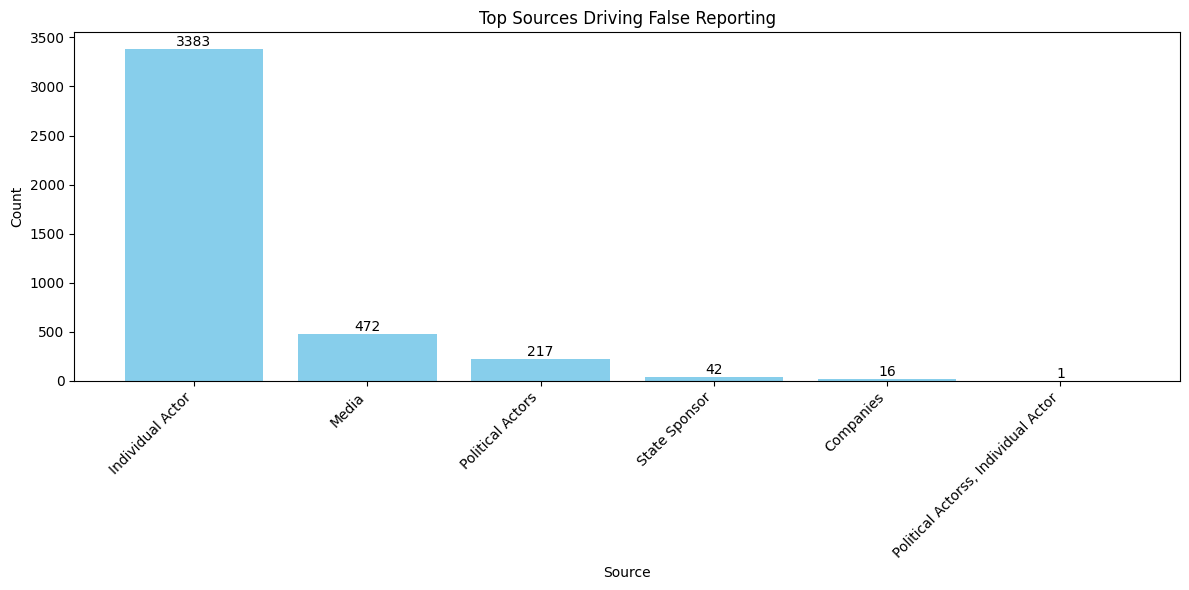

In [13]:
# Check if 'Source' and 'Misinfo_Type' columns exist
if 'Source' in df.columns and 'Misinfo_Type' in df.columns:
    # Filter data for false reporting records
    false_reporting_data = df[df['Misinfo_Type'] == 'False Reporting']

    # Calculate the top 10 sources driving false reporting
    top_sources = false_reporting_data['Source'].value_counts().head(10)

    # Plot the bar chart for top sources
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_sources.index, top_sources.values, color='skyblue')
    plt.title('Top Sources Driving False Reporting')
    plt.xlabel('Source')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()

    plt.savefig('../../8_final_visualisations/esoc/top_sources_driving_false_reporting_histogram.png', dpi=300)    
    
    plt.show()
else:
    print("The columns 'Source' or 'Misinfo_Type' do not exist in the dataset.")


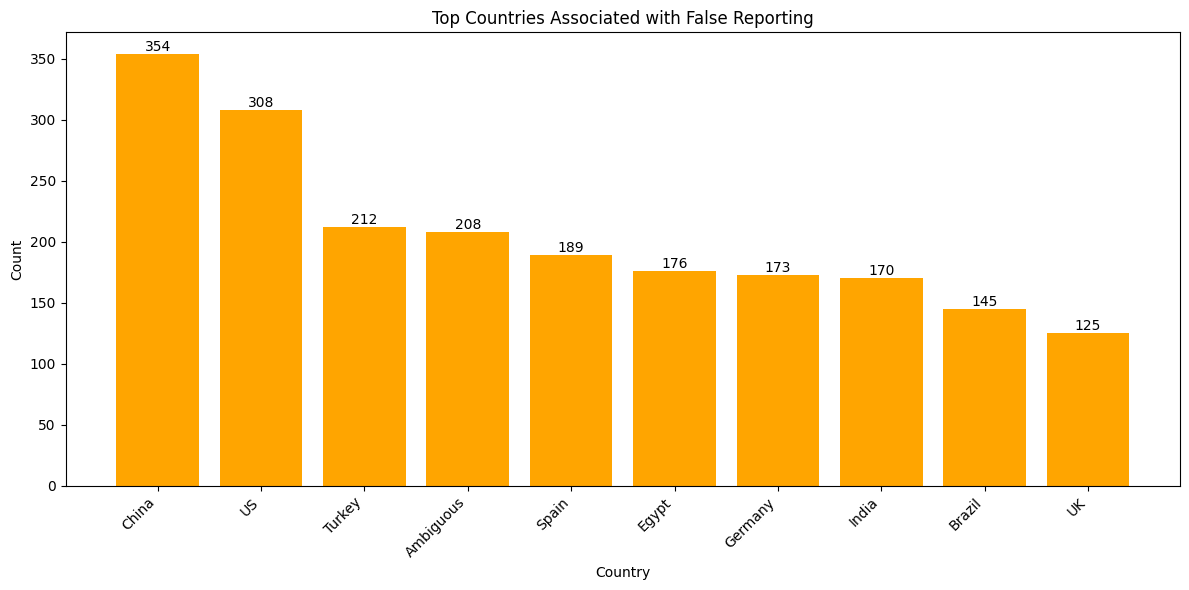

In [14]:
# Check if 'Primary_Country' and 'Misinfo_Type' columns exist
if 'Primary_Country' in df.columns and 'Misinfo_Type' in df.columns:
    # Filter data for false reporting records
    false_reporting_data = df[df['Misinfo_Type'] == 'False Reporting']

    # Calculate the top 10 countries associated with false reporting
    top_countries = false_reporting_data['Primary_Country'].value_counts().head(10)

    # Plot the bar chart for top countries
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_countries.index, top_countries.values, color='orange')
    plt.title('Top Countries Associated with False Reporting')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/top_countries_associated_with_false_reporting.png', dpi=300)           
    plt.show()
else:
    print("The columns 'Primary_Country' or 'Misinfo_Type' do not exist in the dataset.")


Key Drivers Behind False Reporting in the Context of Sources and Countries:

Top Sources Driving False Reporting:

    Individual Actors: The majority of false reporting originates from individual actors (3,383 occurrences), indicating the significant role of personal misinformation dissemination.
    Media: Media outlets are the second-largest source, contributing to 472 instances of false reporting.
    Political Actors: Political figures or groups play a notable role, with 217 occurrences.
    State Sponsors: False reporting from state-sponsored entities appears less frequently (42 occurrences), but their potential for widespread influence is high.

Top Countries Associated with False Reporting:

    China: The most frequent country associated with false reporting, with 354 instances.
    United States: A close second, with 308 instances, reflecting its prominence in global misinformation.
    Turkey and Ambiguous: Turkey (212) and ambiguous records (208) suggest regional or undefined sources of false reporting.
    Spain, Egypt, and Germany: Each country has over 170 occurrences, showing a global distribution of false reporting.
    India, Brazil, and UK: Other significant contributors to the false reporting landscape.

Insights:

    Individual Impact: The dominance of individual actors highlights the need for awareness campaigns targeting personal accountability in sharing information.
    Media and Politics: Media and political entities' roles suggest systemic or institutional involvement in false reporting.
    Global Spread: Countries like China, the US, and Turkey lead in occurrences, reflecting diverse origins of false information.

**Patterns Emerging from Misinformation Sources**

Based on the analysis, several key patterns can be identified from the sources of misinformation in the dataset:

1. Dominance of Individual Actors

    High Frequency: Individual actors are the leading source of misinformation, responsible for 3,383 occurrences.
    Key Pattern: This dominance suggests that misinformation is often spread by everyday users on social media or through personal interactions.
    Implication: Tackling misinformation requires targeting individuals through education campaigns, fact-checking tools, and media literacy programs.

2. Media as a Misinformation Amplifier

    Role of Media: Media outlets are the second-largest source, with 472 occurrences. This could reflect:
        Sensationalism to attract clicks or views.
        Unintentional errors due to rushed reporting.
        Deliberate misinformation from biased or unregulated outlets.
    Key Pattern: Media plays a dual role—both spreading and combating misinformation—depending on its credibility and intent.
    Implication: Strengthening journalistic integrity and accountability is critical for curbing misinformation at the media level.

3. Political Actors and State Sponsors

    Political Involvement:
        Political actors (217 occurrences) use misinformation as a tool to manipulate narratives, influence public opinion, or discredit opponents.
        State-sponsored misinformation (42 occurrences) is often strategically deployed for propaganda or geopolitical influence.
    Key Pattern: These sources are often associated with conspiracy theories or divisive narratives that target trust in governments, institutions, or global systems.
    Implication: Addressing political misinformation requires regulatory oversight and international cooperation.

4. Companies as Minor Contributors

    Limited Role: Companies account for only 16 occurrences, suggesting that corporate misinformation is not a dominant driver.
    Key Pattern: When companies are involved, it may stem from marketing misinformation, such as false claims about products or services.
    Implication: Regulatory frameworks like consumer protection laws can mitigate such misinformation.

5. Patterns in Combined Sources

    Overlap of Roles: Some records indicate misinformation involving combinations like "Political Actors and Individual Actors." This highlights how misinformation may flow between levels:
        Politicians or institutions post initial claims.
        Individuals amplify these claims through social media.
    Key Pattern: The interplay between institutional and individual sources creates a feedback loop, magnifying the spread of misinformation.
    Implication: Addressing these intertwined patterns requires a multifaceted approach targeting both institutional accountability and individual behavior.

6. Misinformation as a Global Phenomenon

    Cross-Border Influence: State sponsors and political actors often aim their misinformation at international audiences, reflecting the geopolitical nature of the issue.
    Key Pattern: Platforms like Facebook, Twitter, and WhatsApp allow misinformation to transcend borders quickly, making it a global challenge.
    Implication: International cooperation is essential for countering misinformation that targets global audiences.

Conclusion:

The patterns indicate that misinformation originates from multiple sources, with individual actors, media, and political entities playing significant roles. The spread of misinformation is not isolated to a single domain but instead forms a complex web of interactions. Addressing these patterns requires:

    Strengthening media literacy and fact-checking for individuals.
    Promoting journalistic integrity in media outlets.
    Regulating political and state-sponsored content to ensure transparency.



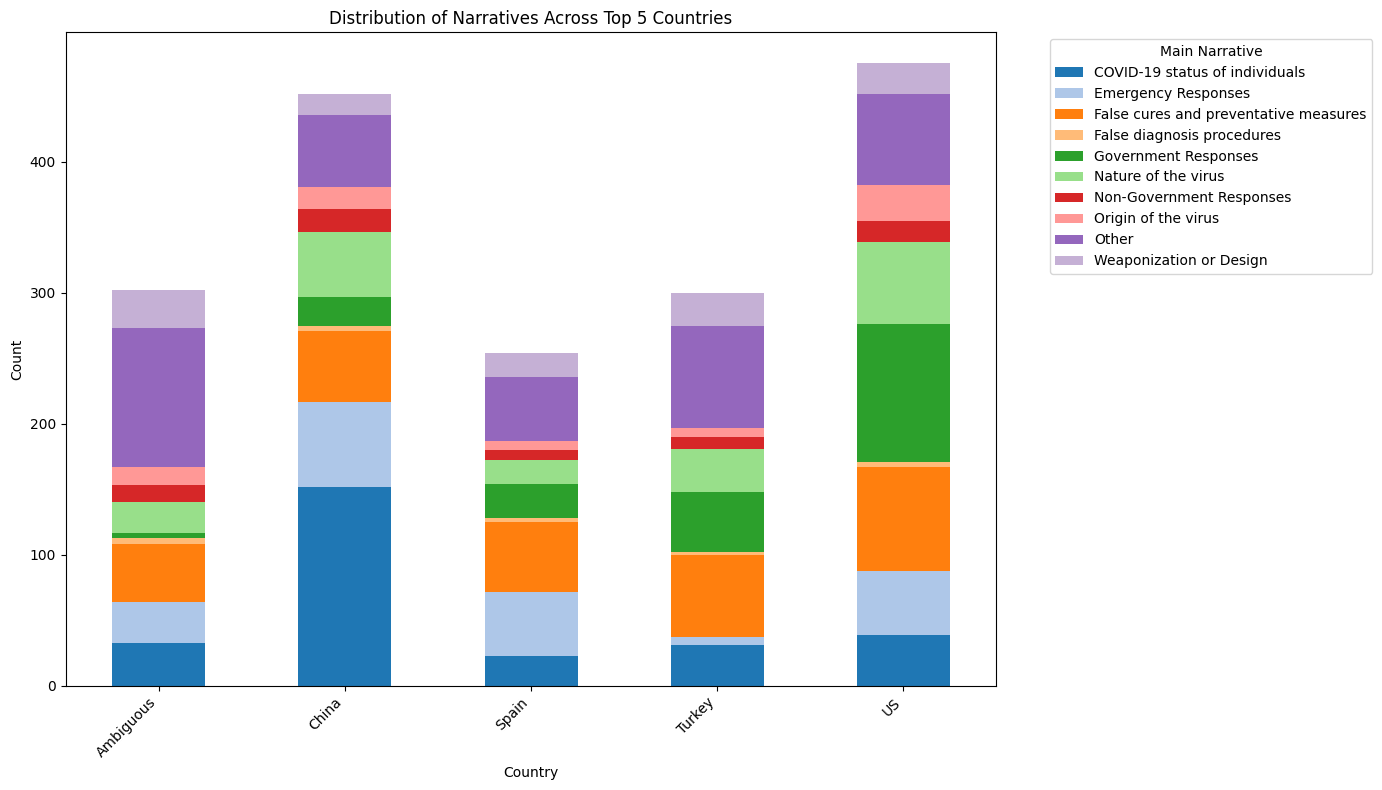

In [15]:
# Check if 'Primary_Country' and 'Main_Narrative' columns exist
if 'Primary_Country' in df.columns and 'Main_Narrative' in df.columns:
    # Identify the top 5 countries based on occurrence
    top_countries = df['Primary_Country'].value_counts().head(5).index

    # Filter and create a pivot table
    country_narrative_interaction = (
        df[df['Primary_Country'].isin(top_countries)]
        .groupby(['Primary_Country', 'Main_Narrative']).size().unstack(fill_value=0)
    )

    # Plot the stacked bar chart
    import matplotlib.pyplot as plt

    country_narrative_interaction.plot(
        kind='bar',
        figsize=(14, 8),
        stacked=True,
        title='Distribution of Narratives Across Top 5 Countries',
        xlabel='Country',
        ylabel='Count',
        color=plt.cm.tab20.colors  # Use a color palette
    )
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Main Narrative', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.savefig('../../8_final_visualisations/esoc/distribution_of_narratives_accross_5_countries_stacked_bar.png', dpi=300)    

    plt.show()
else:
    print("The columns 'Primary_Country' or 'Main_Narrative' do not exist in the dataset.")


In [16]:
# Check if 'Primary_Country' and 'Main_Narrative' columns exist
if 'Primary_Country' in df.columns and 'Main_Narrative' in df.columns:
    # Create a pivot table for all countries and narratives
    country_narrative_patterns = (
        df.groupby(['Primary_Country', 'Main_Narrative']).size().unstack(fill_value=0)
    )

    # Display the pivot table
    from IPython.display import display
    display(country_narrative_patterns)
else:
    print("The columns 'Primary_Country' or 'Main_Narrative' do not exist in the dataset.")


Main_Narrative,COVID-19 status of individuals,Emergency Responses,False cures and preventative measures,False diagnosis procedures,Government Responses,Nature of the virus,Non-Government Responses,Origin of the virus,Other,Weaponization or Design
Primary_Country,,,,,,,,,,
Afghanistan,1,0,4,3,0,6,0,7,7,0
Algeria,4,7,1,0,1,1,1,0,10,0
Ambiguous,33,31,44,5,4,23,13,14,106,29
American Samoa,0,1,0,0,0,0,0,0,0,0
Andorra,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of",2,2,8,0,4,0,0,0,0,1
"Virgin Islands, U.S.",0,0,0,0,0,1,0,0,0,0
Yemen,2,0,0,0,0,0,0,0,1,0


The analysis of country-level patterns for narratives reveals significant trends:

Key Findings:

    United States (US):
        Dominates in narratives such as "Government Responses" (105 occurrences) and "False Cures and Preventative Measures" (79 occurrences).
        High counts in "Nature of the Virus" (63) and "Emergency Responses" (49), reflecting misinformation related to public health measures and the virus's nature.
        
        The United States (US) has the most narratives, with a total count of 475. This indicates the US as a major focal point for diverse misinformation narratives in the dataset. Let me know if you'd like further exploration of these narratives or related trends! ​
​

    China:
        Strong focus on "COVID-19 Status of Individuals" (152 occurrences) and "Emergency Responses" (65), suggesting narratives around the control of individual cases and national-level responses.
        "Nature of the Virus" (49) and "False Cures" (54) also feature prominently, tied to health misinformation.

    Ambiguous:
        High counts in the "Other" category (106 occurrences), indicating unclear or less-defined narratives.
        Notable presence in "Weaponization or Design" (29) and "False Cures" (44), reflecting diverse origins of misinformation.

    Turkey:
        Leading narratives include "False Cures and Preventative Measures" (63) and "Other" (78), emphasizing health misinformation and undefined narratives.
        "Government Responses" (46) and "Nature of the Virus" (33) also appear prominently.

    Spain:
        Similar patterns to Turkey, with a focus on "Emergency Responses" (49) and "False Cures" (53).
        Notable contributions to "Government Responses" (26) and "Nature of the Virus" (18).

Observations:

    Health Misinformation: Across all countries, "False Cures and Preventative Measures" is a common narrative.
    Geopolitical Narratives: Countries like China and ambiguous entries show higher occurrences in "Weaponization or Design" and "Origin of the Virus," highlighting politically charged narratives.
    Undefined Narratives: The dominance of "Other" in several countries suggests a need for better narrative categorization.

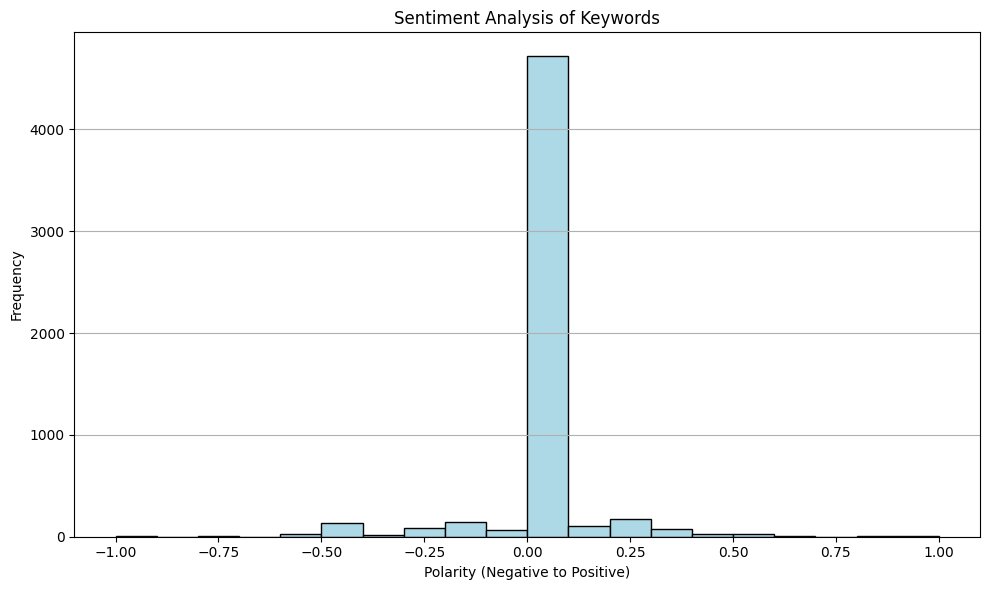

In [17]:
# Check if 'Key_Words' column exists
if 'Key_Words' in df.columns:
    from textblob import TextBlob  # Import TextBlob for sentiment analysis

    # Sentiment analysis for Keywords
    df['Keywords_Sentiment'] = df['Key_Words'].dropna().apply(
        lambda x: TextBlob(str(x)).sentiment.polarity
    )

    # Visualize the sentiment distribution for Keywords
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.hist(df['Keywords_Sentiment'].dropna(), bins=20, color='lightblue', edgecolor='black')
    plt.title('Sentiment Analysis of Keywords')
    plt.xlabel('Polarity (Negative to Positive)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.tight_layout()
    
    plt.savefig('../../8_final_visualisations/esoc/sentiment_analysis_histogram.png', dpi=300)        
    plt.show()
else:
    print("The column 'Key_Words' does not exist in the dataset.")


In [19]:
# Save the sentiment analysis results for keywords to a CSV file
df[['Key_Words', 'Keywords_Sentiment']].to_csv('Keyword_Sentiment_Analysis.csv', index=False)



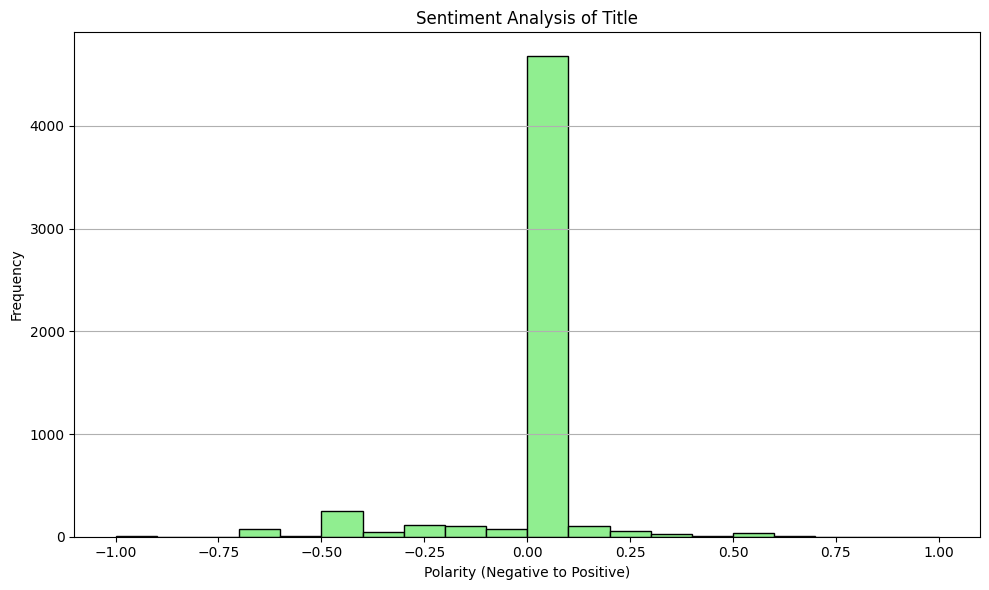

In [20]:
# Check if the relevant columns exist
columns_to_analyze = ['Title']
for col in columns_to_analyze:
    if col in df.columns:
        # Perform sentiment analysis for each column
        sentiment_column_name = f"{col}_Sentiment"
        df[sentiment_column_name] = df[col].dropna().apply(
            lambda x: TextBlob(str(x)).sentiment.polarity
        )

        # Visualize the sentiment distribution for the column
        plt.figure(figsize=(10, 6))
        plt.hist(df[sentiment_column_name].dropna(), bins=20, color='lightgreen', edgecolor='black')
        plt.title(f'Sentiment Analysis of {col}')
        plt.xlabel('Polarity (Negative to Positive)')
        plt.ylabel('Frequency')
        plt.grid(axis='y')
        plt.tight_layout()
        
        plt.savefig('../../8_final_visualisations/esoc/sentiment_analysis_title_histogram.png', dpi=300)  
        
        plt.show()
    else:
        print(f"The column '{col}' does not exist in the dataset.")


**Comparison of keyword sentiment with title sentiment, similarities and differences between their distributions as seen in their respective graphs. **

Here’s a breakdown:

Similarities

    Dominance of Neutral Sentiment
        Both the keywords and titles exhibit a high concentration of neutral sentiment.
        This neutrality suggests that most misinformation in the dataset avoids overtly emotional or polarizing language, likely aiming to maintain credibility or mimic legitimate reporting.

    Sparse Positive and Negative Sentiment
        In both cases, the occurrence of distinctly positive or negative sentiment is limited. Most records fall within a narrow range close to neutral, with small deviations toward positive or negative.

    Potential Strategic Intent
        For both titles and keywords, this neutral tone could be a deliberate tactic by misinformation sources to appear balanced, credible, or less inflammatory, thus evading detection by algorithms or suspicion from readers.

Differences

    Distribution Spread
        Keywords: The keyword sentiment shows a slightly wider spread toward negative sentiment, suggesting that certain keywords might invoke stronger emotional reactions (e.g., fear, skepticism, or anger).
        Titles: Title sentiment tends to cluster even more tightly around neutral, reflecting an intent to stay objective or concise while capturing attention.

    Function of Keywords vs. Titles
        Keywords: These often highlight specific themes or narratives and may include emotionally charged or controversial words that influence sentiment.
        Titles: Titles typically focus on summarizing or introducing the content and are less likely to include words with strong sentiment to maintain a neutral and credible facade.

    Impact of Dataset Composition
        The nature of keywords (e.g., extracted terms or manually curated) might skew the sentiment slightly negative if negative narratives (like "scandal," "crisis," or "death") are prevalent.
        Titles are likely shaped by editorial choices that favor neutrality for broader appeal and avoidance of overt emotionality.

Key Insights from Comparison

    Misinformation Trends
        The dominance of neutral sentiment across both keywords and titles suggests that misinformation sources often prioritize subtlety over overt manipulation through emotional language.
        This aligns with tactics where misinformation embeds itself into public discourse by mirroring the tone of legitimate content.

    Detection Challenges
        The neutral sentiment trend in both categories complicates the detection of misinformation based solely on sentiment analysis. Additional context, patterns, or metadata may be needed for robust identification.

    Implications for Further Analysis
        Combining sentiment analysis of both titles and keywords with narrative or source analysis could reveal deeper insights into misinformation strategies.
        Comparing sentiment across time or geographies might help identify shifts in tone or strategy by misinformation actors.

In [26]:
import seaborn as sns

**Trends in Reports Over Time:** The number of reports peaked in March 2020 and then gradually declined, with slight increases during mid-year.

<ipython-input-28-59d1f777ba77>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication_Date'] = pd.to_datetime(df['Publication_Date'])


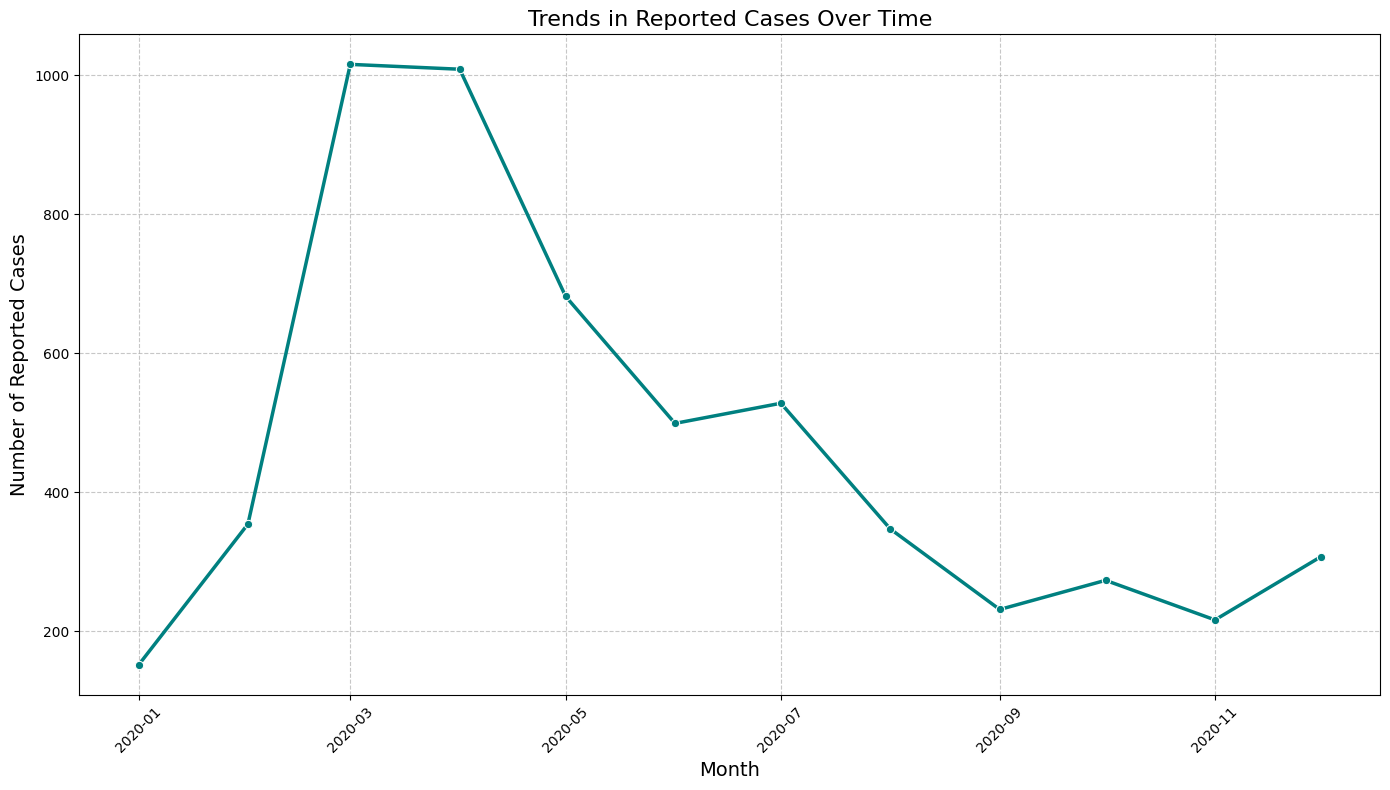

In [28]:
# Ensuring the Publication_Date Column is in Datetime Format
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'])

# Grouping Data by Time (Daily, Weekly, or Monthly)
# Group by month for a smoother trend, adjust as needed
df['Month'] = df['Publication_Date'].dt.to_period('M')  # Group by month
trend_data = df.groupby('Month').size().reset_index(name='Reported_Cases')

# Converting Period to Datetime for plotting
trend_data['Month'] = trend_data['Month'].dt.to_timestamp()

# Plotting the Trends in Reported Cases Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='Month', y='Reported_Cases', marker='o', linewidth=2.5, color='teal')
plt.title('Trends in Reported Cases Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reported Cases', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/trends_in_cases_time_series.png', dpi=300)  

# Displaying the Plot
plt.show()


**Investigating The Spike**

In [31]:
# Filtering data for spike periods
spike_period = ['2020-02-15', '2020-05-15']
spike_data = df[(df['Publication_Date'] >= spike_period[0]) & (df['Publication_Date'] <= spike_period[1])]

# Analyzing Keywords
keywords_count = spike_data['Key_Words'].str.split(',').explode().value_counts().head(10)
print("Top Keywords during Spike:", keywords_count)

# Analyzing Narratives
narrative_count = spike_data['Main_Narrative'].value_counts().head(10)
print("Top Narratives during Spike:", narrative_count)

# Analyzing Sources
source_count = spike_data['Source'].value_counts().head(10)
print("Top Sources during Spike:", source_count)



Top Keywords during Spike: Key_Words
Coronavirus    2242
 China          159
Turkey          128
 cure           118
 Italy          103
 lockdown        91
 vaccine         85
 US              77
 Germany         75
 Japan           70
Name: count, dtype: int64
Top Narratives during Spike: Main_Narrative
Other                                    624
Emergency Responses                      581
False cures and preventative measures    409
COVID-19 status of individuals           376
Nature of the virus                      193
Origin of the virus                      112
Government Responses                     112
Weaponization or Design                  109
Non-Government Responses                  44
False diagnosis procedures                28
Name: count, dtype: int64
Top Sources during Spike: Source
Individual Actor                       2114
Media                                   334
Political Actors                         83
State Sponsor                            37
Companie

**SPIKE CONCLUSION**

From the spike in March and April 2020, here are some brief conclusions based on the analysis:
1. Top Keywords

    The dominance of "Coronavirus" indicates the centrality of the COVID-19 pandemic during this period.
    Other highly mentioned keywords such as China, Turkey, Italy, and lockdown suggest:
        Geographic focus on countries heavily impacted by the pandemic at the time.
        Discussions about measures (e.g., lockdowns) and misinformation related to those regions.
    Keywords like cure and vaccine highlight a focus on misinformation about treatments and preventative measures.

2. Top Narratives

    The most common narratives during this spike include:
        "Emergency Responses" and "Government Responses":
            Likely driven by misinformation about official measures, restrictions, or interventions.
        "False cures and preventative measures":
            Suggests widespread misinformation about unverified treatments and protective measures (e.g., "miracle cures").
        "Nature of the virus" and "Origin of the virus":
            Indicates speculation and conspiracy theories about COVID-19’s origin, often involving geopolitical tensions.
        "Weaponization or Design":
            Suggests narratives that the virus was deliberately created or used as a weapon.

3. Top Sources

    Individual Actors (2114):
        The overwhelming contribution from individuals highlights the role of social media and non-verified personal accounts in spreading misinformation during this period.
    Media (334):
        Indicates that some media outlets amplified misinformation, whether intentionally or not.
    Political Actors and State Sponsors:
        Suggests that misinformation may have also been weaponized by political figures or state-affiliated entities.

Overall Insights:

    The spike in reported cases corresponds with the early global impact of the COVID-19 pandemic, where uncertainty and fear fueled a surge in misinformation.
    False cures and preventative measures dominated the narratives, likely driven by public desperation for solutions.
    The geographic focus on China, Italy, Turkey, and the US aligns with the major COVID-19 hotspots at the time and the political narratives surrounding the virus' origin and response.
    The significant role of Individual Actors emphasizes the importance of addressing misinformation on social media platforms during crises.

This combination of keywords, narratives, and sources points to a global misinformation surge fueled by fear, uncertainty, and conflicting information during the pandemic’s early phase

**GLOBAL CONTEXT AT THE TIME**

Context of March and April 2020 in the COVID-19 Pandemic

During March and April 2020, the COVID-19 pandemic escalated globally, marking a period of heightened uncertainty, rapid developments, and widespread public fear. Governments, health organizations, and media were responding to an unprecedented crisis. This context created fertile ground for the surge in misinformation.
Key Realities of the Time Period

    Global Spread:
        The virus was declared a pandemic by the World Health Organization (WHO) on 11th March 2020.
        Countries such as China, Italy, Spain, and the US were experiencing high case numbers and deaths.
        Travel restrictions, nationwide lockdowns, and quarantines were implemented worldwide.

    Healthcare Systems Under Pressure:
        Hospitals faced shortages of ventilators, personal protective equipment (PPE), and ICU beds.
        Testing capacities were limited, causing delays in diagnosing cases and reporting.

    Misinformation Surge:
        False Cures and Treatments: Misinformation about "miracle cures" like hydroxychloroquine and bleach was prevalent.
        Virus Origin Theories: Claims emerged about COVID-19 being a bioweapon or linked to specific governments.
        Lockdown Skepticism: Debates on the efficacy and necessity of lockdowns fueled public confusion.
        Anti-vaccine Narratives: Early opposition to vaccine development and misinformation about their safety began to circulate.

    Economic Impact:
        Major economies entered recessions, with unemployment spiking due to lockdowns.
        Governments introduced stimulus packages and financial aid, leading to misinformation about their implications.

    Social and Political Tensions:
        Misinformation campaigns targeted specific groups (e.g., migrants, specific nations), escalating xenophobia and geopolitical tensions.
        Social media became a battleground for debates over government responses, with many turning to unverified sources for information.

Evidence-Based Observations

    Trust Deficit: Surveys during this time showed declining trust in governments, media, and institutions, leaving individuals more vulnerable to misinformation.
    Role of Social Media: Studies revealed that misinformation spread faster on platforms like Twitter, Facebook, and WhatsApp than official sources of information.
    Behavioral Impact: False narratives about cures or preventative measures led some people to take dangerous actions (e.g., self-medicating with hydroxychloroquine or alcohol).
    Media Role: Some media outlets failed to verify information or amplified sensational claims, further fueling public anxiety.

Brief Summation of March-April 2020

    Crisis Context:
        This was the "panic phase" of the pandemic, marked by widespread fear, rapid policy changes, and a lack of definitive scientific guidance.
    Misinformation as a Parallel Epidemic:
        Misinformation thrived due to uncertainty, rapid developments, and the public's desperation for answers and solutions.
    Dominant Themes:
        Narratives around cures, government responses, lockdowns, and the virus' origin reflected the global focus on managing the pandemic and geopolitical tensions.
    Impact:
        Misinformation undermined trust in public health measures and delayed effective crisis response, exacerbating the pandemic's societal and economic toll.

This period highlights the need for robust, trusted communication channels and proactive misinformation management during crises. It also underscores the critical role of social media platforms, governments, and scientific bodies in curbing the spread of false information.

**MOTIVES**

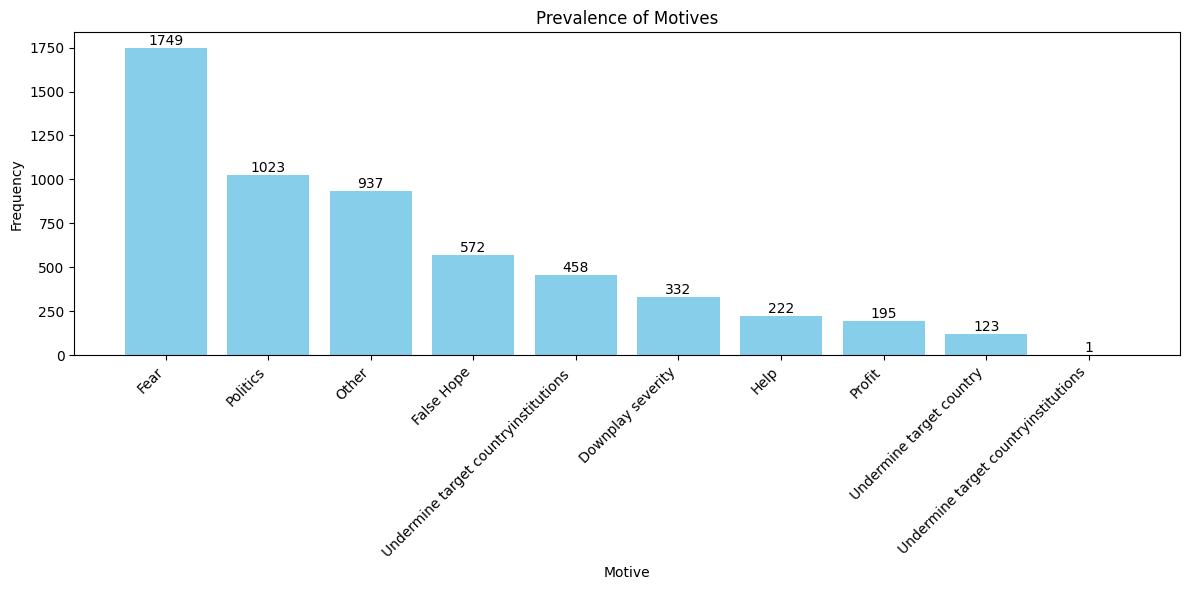

In [38]:
# Prevalence of Motive
motive_counts = df['Motive'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(motive_counts.index, motive_counts.values, color='skyblue')
plt.title('Prevalence of Motives')
plt.xlabel('Motive')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding frequency counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.savefig('../../8_final_visualisations/esoc/prevalence_of_motives_histogram.png', dpi=300)  


In [49]:
import numpy as np

<ipython-input-51-9b72e4652bc6>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


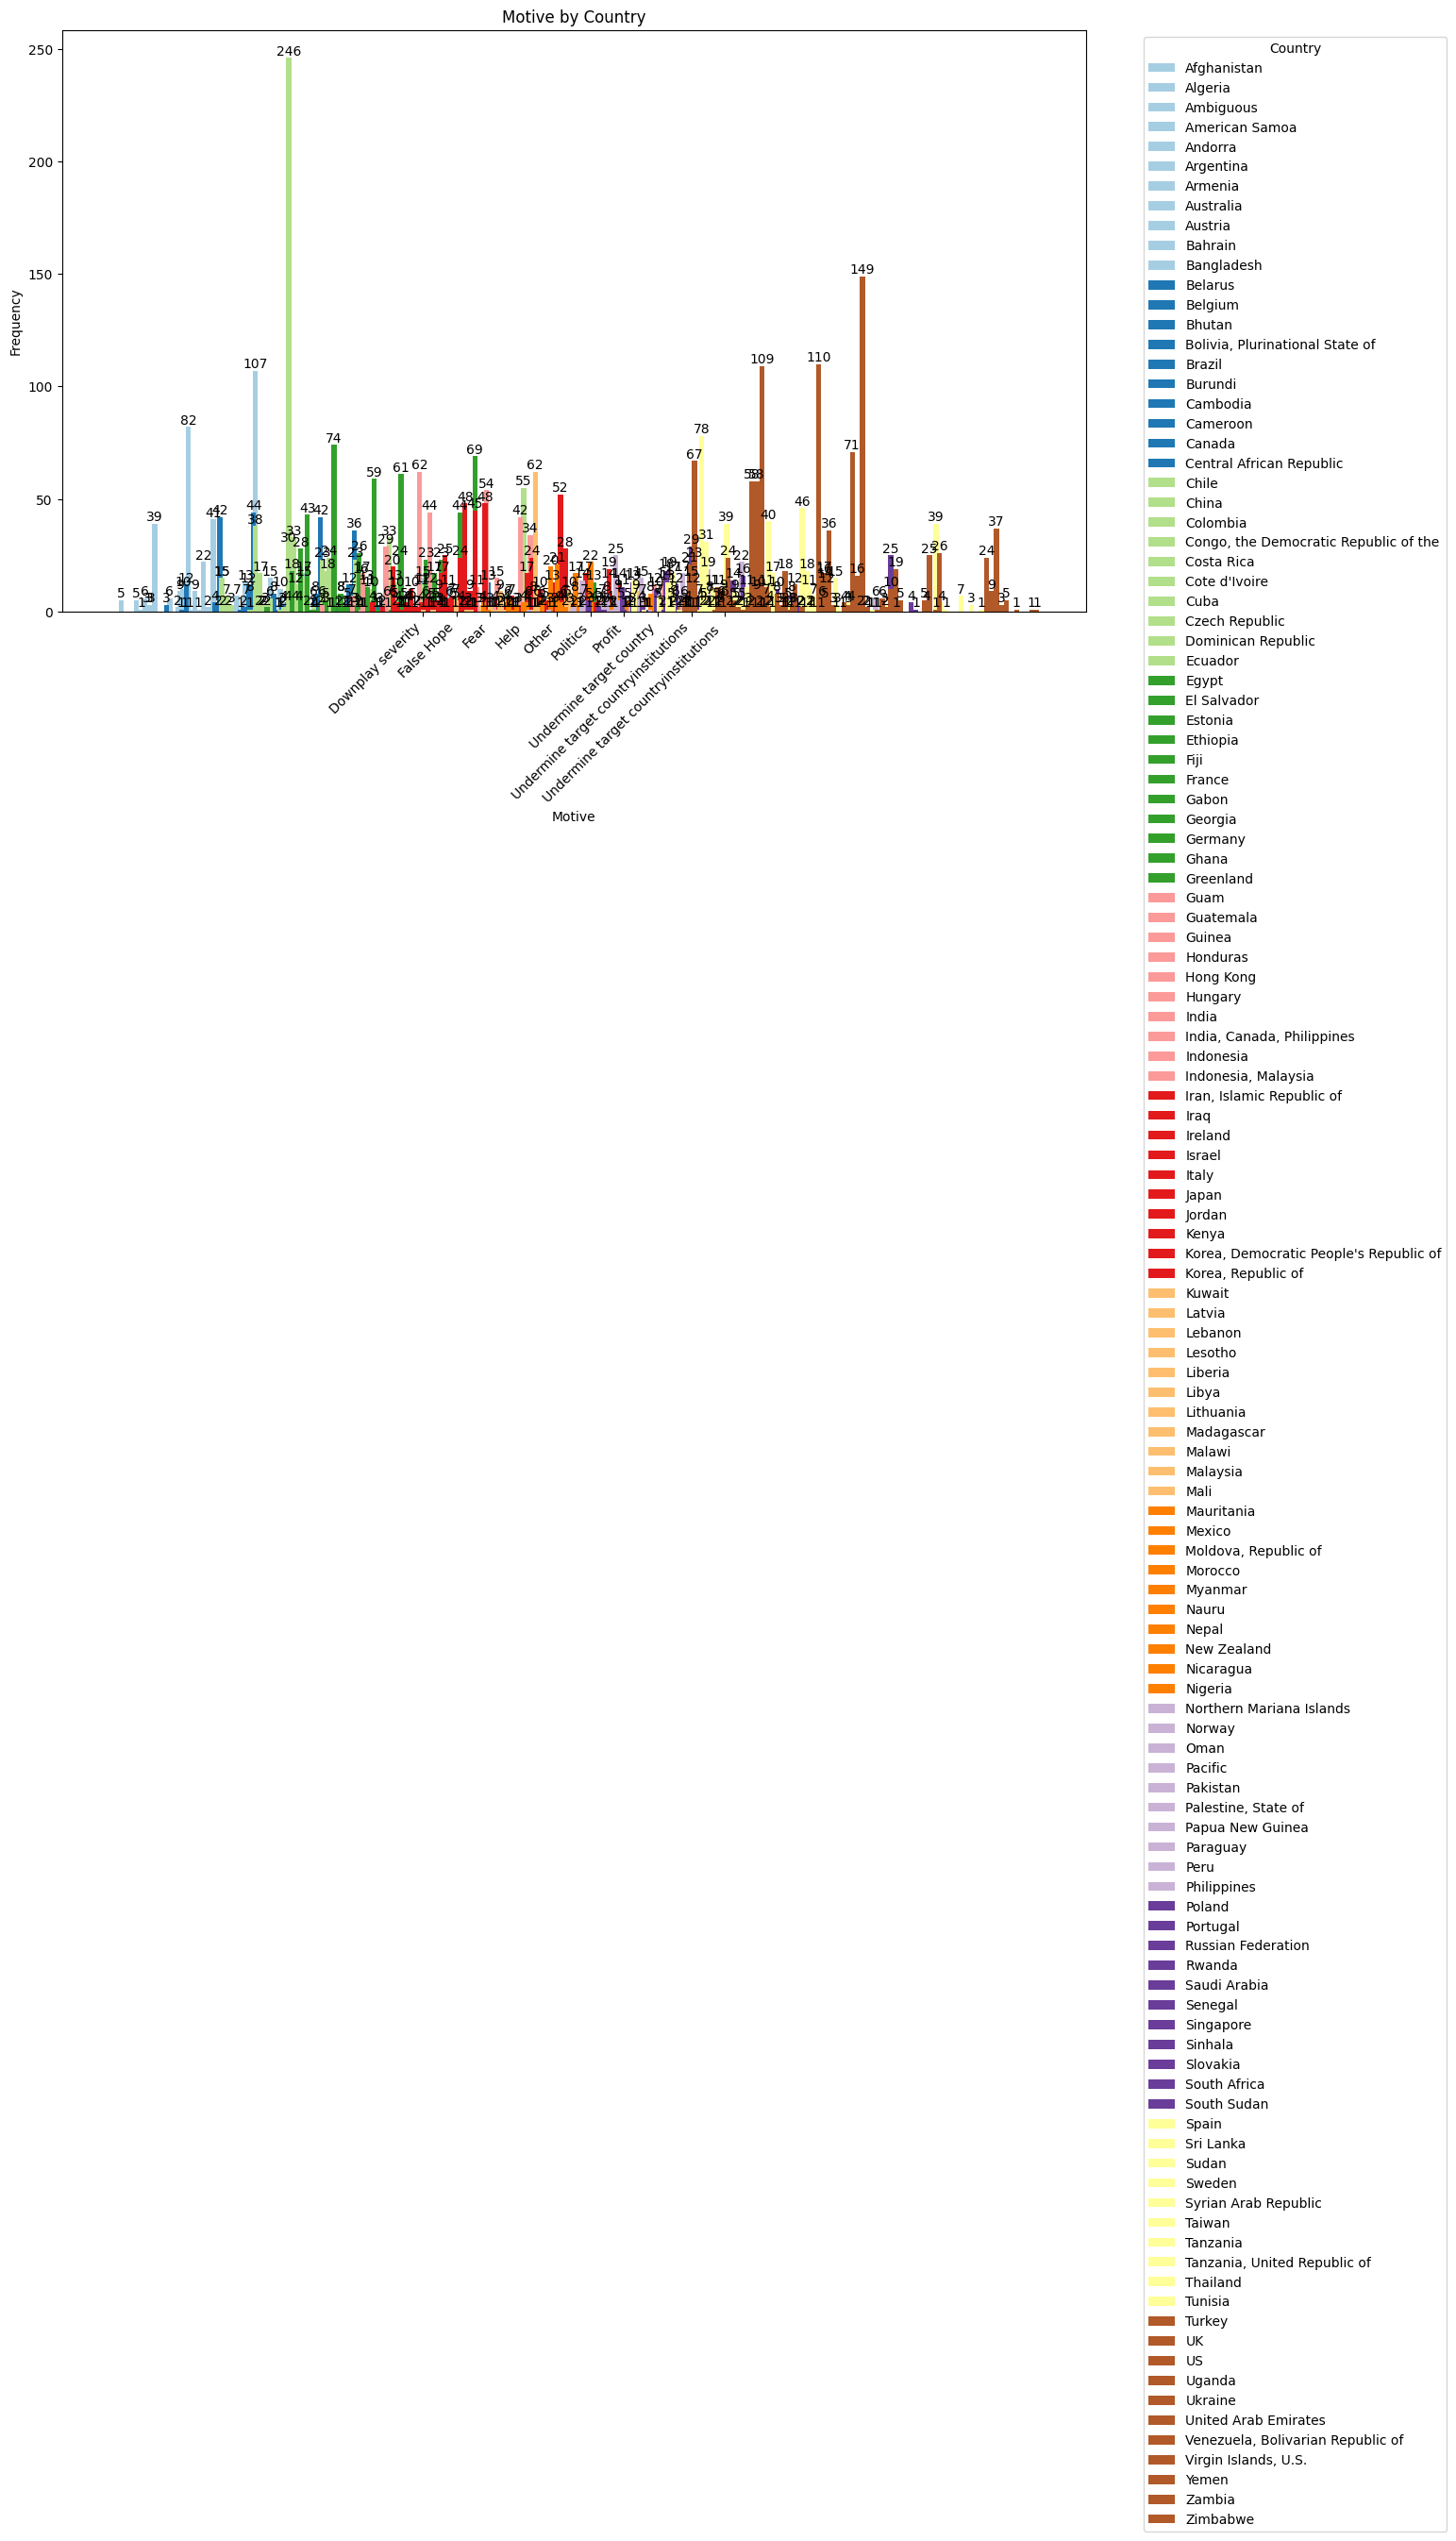

In [51]:
# Ensure 'Motive' is included in the DataFrame before melting
df_countries = df[['Motive', 'Primary_Country', 'Primary_Country2', 'Primary_Country3', 'Primary_Country4']].melt(
    id_vars='Motive',  # Keep 'Motive' column during melting
    value_vars=['Primary_Country', 'Primary_Country2', 'Primary_Country3', 'Primary_Country4'],
    value_name='Country',
    var_name='Country_Source'
)

# Drop rows where 'Country' is NaN
df_countries = df_countries.dropna(subset=['Country'])

# Group by Motive and Country
motive_by_country = df_countries.groupby(['Motive', 'Country']).size().unstack(fill_value=0)

# Creating a grouped bar chart for better frequency labelling
plt.figure(figsize=(14, 8))
x = np.arange(len(motive_by_country.index))  # Motive indices
width = 0.15  # Bar width
colors = plt.cm.Paired(np.linspace(0, 1, len(motive_by_country.columns)))

# Plotting bars for each country
for i, country in enumerate(motive_by_country.columns):
    bars = plt.bar(x + i * width, motive_by_country[country], width, label=country, color=colors[i])
    # Adding frequency counts on top of bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label bars with non-zero height
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Formatting the grouped bar chart
plt.title('Motive by Country')
plt.xlabel('Motive')
plt.ylabel('Frequency')
plt.xticks(x + width * (len(motive_by_country.columns) - 1) / 2, motive_by_country.index, rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/motive_by_country_bar_chart.png', dpi=300)  

plt.show()



In [52]:
import plotly.express as px

In [56]:
# Combining all country columns into a single column
df_countries = df.melt(
    id_vars=['Motive'],  # Keep the 'Motive' column
    value_vars=['Primary_Country', 'Primary_Country2', 'Primary_Country3', 'Primary_Country4'],  # Country columns
    value_name='Country',  # New column for countries
    var_name='Country_Source'  # Source column (optional)
).dropna(subset=['Country'])  # Drop rows where 'Country' is NaN

# Grouping by Motive and Country, then count occurrences
motive_country_counts = df_countries.groupby(['Country', 'Motive']).size().reset_index(name='Frequency')

# Looping through each motive and create a map
for motive in motive_country_counts['Motive'].unique():
    # Filter data for the current motive
    motive_data = motive_country_counts[motive_country_counts['Motive'] == motive]

    # Creating a choropleth map for the current motive
    fig = px.choropleth(
        motive_data,
        locations='Country',  # Country names
        locationmode='country names',  # Match country names with map locations
        color='Frequency',  # Frequency to use for color scale
        color_continuous_scale='YlGnBu',  # Color scale
        title=f'Frequency of "{motive}" Motive by Country',  # Title for each motive
        labels={'Frequency': 'Occurrences'}  # Label for legend
    )

    # Updating map layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'  # Map projection
        ),
        title_font_size=20
    )

    # Display the map
    fig.show()

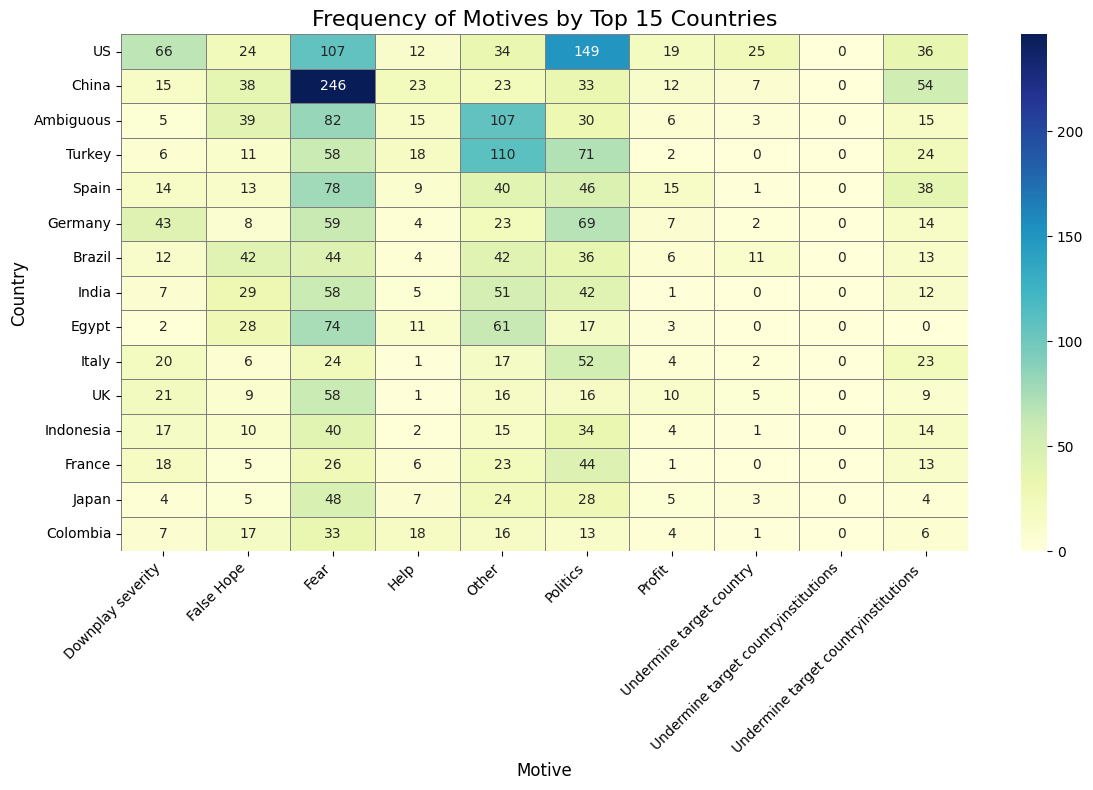

In [65]:
# Combine all country columns into a single column
df['Combined_Country'] = df[['Primary_Country', 'Primary_Country2', 'Primary_Country3', 'Primary_Country4']].fillna('').agg(', '.join, axis=1).str.strip(', ')
df_combined = df[['Combined_Country', 'Motive']].dropna()

# Group by Combined_Country and Motive to calculate frequency
motive_country_table = df_combined.groupby(['Combined_Country', 'Motive']).size().unstack(fill_value=0)

# Reduce to the top 15 countries by total frequency for better visualization
top_countries = motive_country_table.sum(axis=1).nlargest(15).index
motive_country_table = motive_country_table.loc[top_countries]

# Create a heatmap-like table using Seaborn
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(motive_country_table,
            annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            linewidths=0.5, linecolor='gray')

# Add titles and labels
plt.title('Frequency of Motives by Top 15 Countries', fontsize=16)
plt.xlabel('Motive', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/frequency_of_motive_heatmap.png', dpi=300)  

# Show the heatmap table
plt.show()



**Motivation Conclusions**

Based on the visualization and table of motives by country, here are 10 key points:

1. Top Motives Vary by Region:

    Certain motives like "Undermine target country/institutions" and "Fear" are prevalent in specific regions, likely influenced by geopolitical tensions or local contexts.

2. Dominance of "Fear" and "False Hope" Motives:

    Across multiple countries, "Fear" and "False Hope" are among the most frequently reported motives. These align with misinformation tactics aiming to exploit uncertainty during crises.

3. High Frequency in Key Countries:

    Countries like the United States, China, and Russia show higher overall frequencies of misinformation motives, reflecting their central role in global political and information landscapes.

4. "Politics" as a Key Motive:

    Political motives are highly frequent in countries experiencing internal or external political conflict, suggesting the use of misinformation to influence political processes.

5. Cross-Country Patterns:

    The same motive is often reported in multiple countries simultaneously, indicating coordinated misinformation campaigns or global trends.

6. Economic and Political Targets:

    Motives like "Profit" and "Undermine target country/institutions" are tied to countries with significant geopolitical or economic influence, indicating targeted attacks on stability.

7. "Help" and "Other" Motives Are Less Frequent:

    Positive or neutral motives such as "Help" appear less frequently, reflecting a dominance of harmful or fear-based narratives in misinformation.

8. Focus on Developed Countries:

    A higher number of reports are associated with developed nations, which may indicate either a higher level of reporting capability or a targeted approach toward influential global players.

9. Cultural and Regional Influences:

    Certain motives are more prominent in specific regions, reflecting cultural, political, or societal vulnerabilities that are being exploited by misinformation campaigns.

10. Potential for Further Research:

    The findings highlight patterns that warrant deeper exploration, such as identifying the origin of the misinformation campaigns, their coordination, and their potential impact on public sentiment and behaviour.

Implications:

These findings underscore the need for:

    Enhanced cross-country collaboration in combating misinformation.
    Greater transparency in the sources and motivations behind narratives.
    Targeted interventions tailored to the most affected countries and prevalent motives.

**UK SPECIFIC**

**UK MOTIVES**

<ipython-input-67-4b7fa33eecfa>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




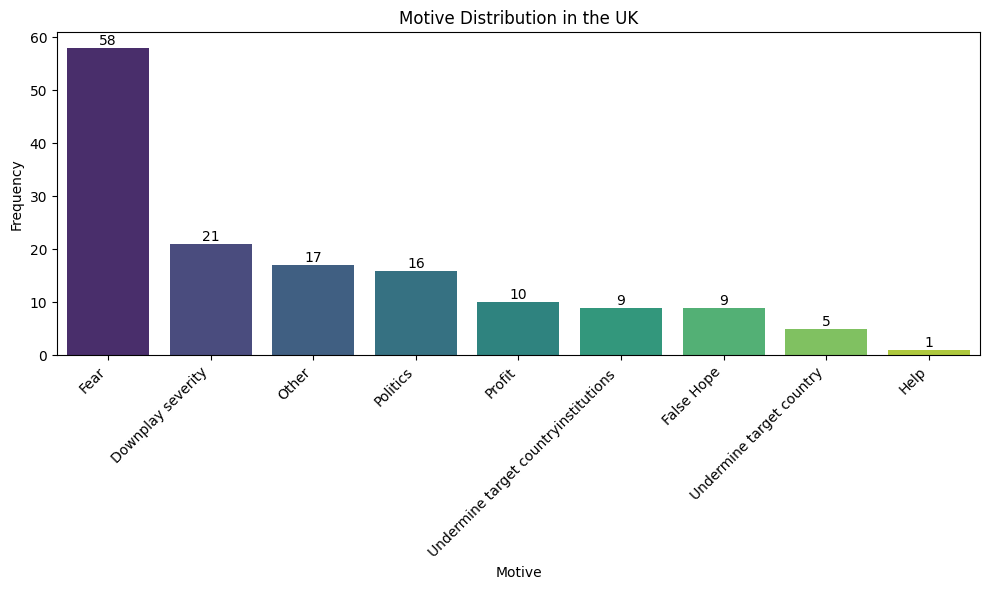

In [67]:
# 1. Visualising Motive for the UK with Frequency Labels
motive_counts = uk_data['Motive'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=motive_counts.index, y=motive_counts.values, palette='viridis')

# Adding frequency labels on the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Motive Distribution in the UK')
plt.xlabel('Motive')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/motive_distribution_uk.png', dpi=300)  

plt.show()

**UK MISINFORMATION TYPES**

<ipython-input-70-e3739b1dbadb>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




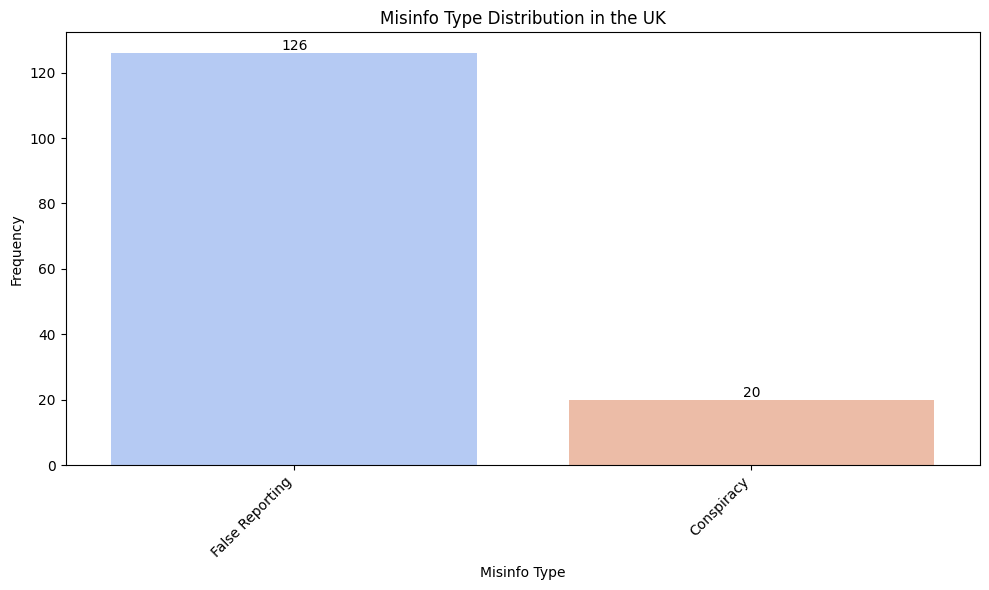

In [70]:
# 2. Visualising Misinfo_Type for the UK with Frequency Labels
misinfo_counts = uk_data['Misinfo_Type'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=misinfo_counts.index, y=misinfo_counts.values, palette='coolwarm')

# Adding frequency labels on the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Misinfo Type Distribution in the UK')
plt.xlabel('Misinfo Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/type_distribution_uk.png', dpi=300)  

plt.show()

UK DISTRIBUTION CHANNELS

<ipython-input-71-357c4ffa25c8>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




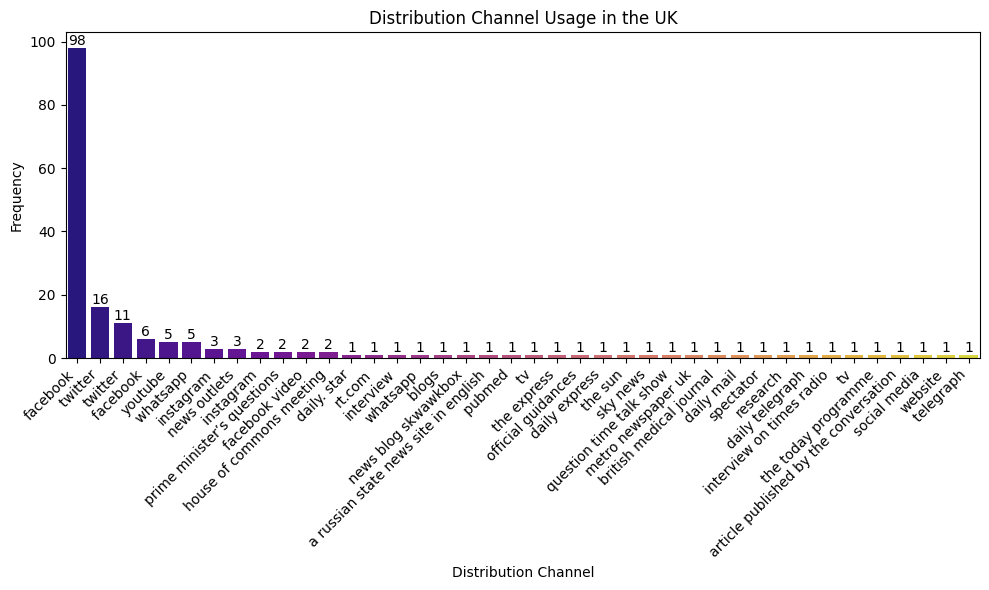

In [71]:
# Combining all Distribution Channel columns into a single column
distribution_channels = uk_data.melt(
    value_vars=['Distrib_Channel', 'Distrib_Channel2', 'Distrib_Channel3', 'Distrib_Channel4', 'Distrib_Channel5', 'Distrib_Channel6'],
    value_name='Channel', var_name='Channel_Source'
)['Channel'].dropna()

# Counting the frequency of each distribution channel
channel_counts = distribution_channels.value_counts()

# Plotting with frequency labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='plasma')

# Adding frequency labels on the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution Channel Usage in the UK')
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/distribution_channel_uk.png', dpi=300)  

plt.show()


**UK SOURCES**

<ipython-input-76-946f247d338d>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




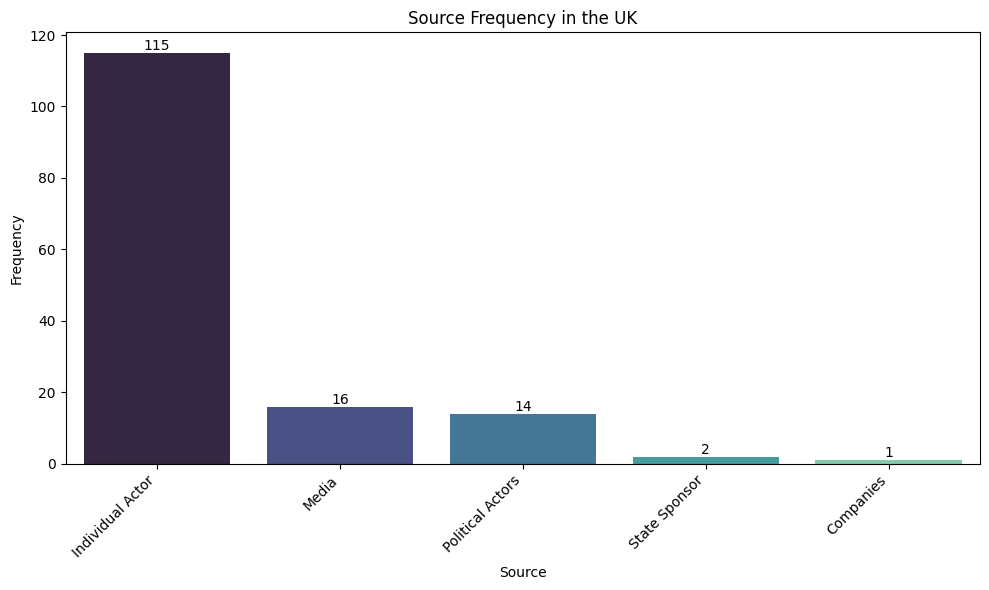

In [76]:
# Combining all Source columns into a single column
sources_combined = uk_data.melt(
    value_vars=['Source', 'Source2', 'Source3'],
    value_name='Source_Combined',  # Use a different name to avoid conflicts
    var_name='Source_Column'
)['Source_Combined'].dropna()

# Count the frequency of each source
source_counts = sources_combined.value_counts()

# Plotting with frequency labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=source_counts.index, y=source_counts.values, palette='mako')

# Adding frequency labels on the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Source Frequency in the UK')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../../8_final_visualisations/esoc/source_frequency_uk.png', dpi=300)  

plt.show()


**Insights on the UK’s COVID-19 Misinformation Data**

    Dominant Motive: Fear
        Fear is the most common motive driving misinformation in the UK, accounting for a significant proportion of cases (58 occurrences). This highlights the emotional impact of misinformation and its potential to manipulate public sentiment and decision-making.

    Key Misinformation Type: False Reporting
        False reporting overwhelmingly dominates the misinformation type in the UK, with 126 cases, compared to only 20 for conspiracy theories. This suggests that misinformation primarily involves fabricated or exaggerated information rather than elaborate conspiracy narratives.

    Primary Distribution Channels
        Facebook is the leading distribution channel, with 98 instances, followed by Twitter and YouTube, indicating the strong role of social media in spreading misinformation.
        Messaging platforms like WhatsApp and visual platforms like Instagram are also notable contributors, reflecting diverse means of spreading false information.

    Secondary Distribution Channels
        Traditional media outlets (e.g., newspapers like The Sun and Daily Mail) and formal contexts (e.g., government meetings) are present but play a smaller role in misinformation distribution.

    Impact on Public Trust
        The prevalence of fear-driven motives and reliance on widespread platforms like Facebook likely contributes to a lack of trust in health authorities and government responses.